<a href="https://colab.research.google.com/github/ming-AA/ai-study/blob/main/Chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chap3. 회귀 알고리즘과 모델 규제

# 3-1. k-최근접 이웃 회귀

## 분류와 회귀
분류
* 샘플을 몇 개의 클래스 중 하나로 분류하는 문제

회귀
* 임의의 어떤 숫자를 예측하는 문제
* 두 변수 사이의 상관관계를 분석하는 방법

## k-최근접
**k-최근접 이웃 분류**
* 예측하려는 샘플에 가장 가까운 샘플 k개를 선택 후 더 많은 클래스 중 하나로 분류

**k-최근접 이웃 회귀**
* 예측하려는 샘플에 가장 가까운 샘플 k개를 선택 후 이웃 샘플의 수치를 사용하여 예측

In [ ]:
import numpy as  np
# 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

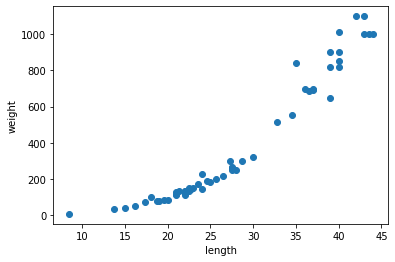

In [ ]:
# 산점도 - 농어
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 핵심 패키지와 함수

**1) KNeighborsRegressor 패키지**
* k-최근접 이웃 회귀 모델을 만드는 사이킷런 클래스
* n_neighbors 매개변수로 이웃의 개수 지정함, 기본값 5

mean_absolute_error()
* 회귀 모델의 평균 절대값 오차를 계산
* 첫번째 매개변수 타깃, 두번째 매개변수 예측값

mean_squared_error()
* 회귀 모델의 평균 제곱 오차를 계산

<br>

**2) numpy 패키지**

train_test_split()
* 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터 나눔

reshape()
* 배열의 크기 변경
* 1차원에서 2차원으로 변경 가능

In [ ]:
# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
# 연습) 배열 차원 변환
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
# 연습) 배열 차원 변환
test_array = test_array.reshape(2,2) # reshape() 함수, 배열의 크기를 바꿈
print(test_array.shape)

(2, 2)


In [ ]:
train_input = train_input.reshape(-1,1) # -1 나머지 원소 개수로 모두 채우기 
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수($R^2$)

정확도
* 분류에서 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율

결정계수
* 점수
* $1-$$(타깃-예측)^2\over(타깃-평균)^2$
* 타깃이 평균과 가까워지면 -> 0
* 타깃이 예측과 가까워지면 -> 1

## 핵심 패키지와 함수

mean_absolute_error()
* 타깃과 예측의 절댓값 오차를 평균하여 반환

In [ ]:
# 모델 생성, 훈련
from sklearn.neighbors import KNeighborsRegressor # k-최근접 이웃 회귀 알고리즘
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# 평가
print(knr.score(test_input, test_target))

0.9928094061010639


In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input) # 테스트 예측
mae = mean_absolute_error(test_target, test_prediction) # 테스트 세트에 대한 평균 절대값 오차 계산, 타깃과 예측한 값 차이

## 과대적합 vs 과소적합

일반적으로 훈련 세트의 점수가 테스트 세트보다 조금 더 높음

과대적합
* 훈련 세트와 테스트 세트의 점수를 비교했을 때 훈련 세트 점수가 너무 높은 경우
* 모델이 훈련 세트에 과도하게 맞춰진 것

과소적합
* 훈련 세트와 테스트 세트의 점수를 비교했을 때 테스트 세트 점수가 너무 높거나 모두 낮은 경우
* 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우, 훈련 세트와 테스트 세트의 크기가 매우 작은 경우 발생할 수 있음

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099255


In [ ]:
# 과소적합 조정, 모델 훈련
knr.n_neighbors = 3  # 이웃의 개수 줄임
knr.fit(train_input, train_target)

# 평가, 훈련 세트
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
# 평가, 테스트 세트
print(knr.score(test_input, test_target))

0.974645996398761


# 3-2. 선형 회귀

## 선형 회귀
* 대표적인 회귀 알고리즘
* 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음
* 특성이 하나면 직선 방정식을 갖게됨
* 선형 회귀가 찾은 특성과 타깃 사이의 관계는 선형 방정식의 계수 또는 가중치에 저장됨
* y = a * x + b

**모델 파라미터**
* 머신러닝 모델이 특성에서 학습한 파라미터를 말함
* 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같음
* 이를 모델 기반 학습이라 부름
* k-최근접 이웃에는 모델 파라미터가 없음
* 이를 사례 기반 학습이라 부름

In [ ]:
# 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 최근접 이웃 개수 3으로 조정
knr = KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
knr.fit(train_input, train_target)
# 예측
print(knr.predict([[50]]))

[1033.33333333]


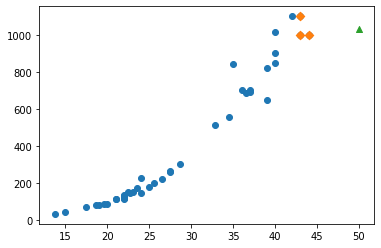

In [ ]:
# 산점도
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]]) # 이웃 구하기
plt.scatter(train_input, train_target) # 산점도 그리기

plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 이웃 샘플만 다시 그림

plt.scatter(50, 1033, marker='^') # 50cm 농어 데이터
plt.show()

In [ ]:
print(np.mean(train_target[indexes])) # 이웃 샘플들의 무게 평균 
print(knr.predict([[100]])) # 샘플이 훈련 세트 범위를 벗어나면 엉뚱한 값 예측

1033.3333333333333
[1033.33333333]


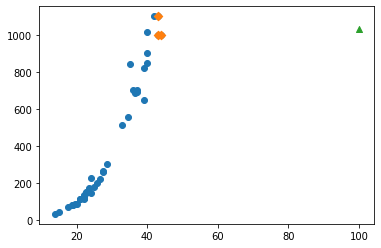

In [ ]:
distances, indexes = knr.kneighbors([[100]]) # 100cm 농어의 이웃 구함
plt.scatter(train_input, train_target) # 훈련 세트 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련 세트 중 이웃 샘플 산점도
plt.scatter(100, 1033, marker='^') #100cm 농어 데이터
plt.show()

## 핵심 패키지와 함수

**1) sklearn 패키지**

LinearRegression 클래스
* 선형 회귀 알고리즘

coef_
* 기울기, 계수, 가중치

intercept_
* 절편

In [ ]:
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델
lr = LinearRegression()
# 모델 훈련
lr.fit(train_input, train_target)
# 모델 예측 - 50cm 농어
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_) # 기울기(coef_), 절편(intercept_) => 모델 파라미터

[39.01714496] -709.0186449535477


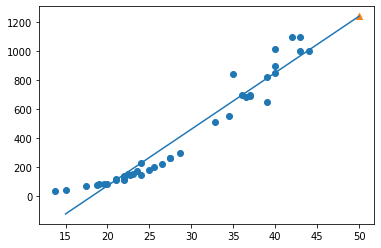

In [ ]:
# 산점도 - 훈련세트
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프 생성
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 산점도 - 5cm 농어
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [ ]:
# 모델 평가
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트
# => 결과, 과소적합, 전체적으로 낮음

0.9398463339976039
0.8247503123313558


## 다항 회귀
* 다항식을 사용하여 특성과 타깃 사이의 관계를 나타냄
* 다항식을 사용한 선형 회귀
* 다항식 : y = a * $x^2$ + b * x + c

In [ ]:
# 2차 방정식 준비 - 농어 길이 제곱 컬럼 추가
train_poly = np.column_stack((train_input ** 2, train_input)) # 훈련 세트
test_poly = np.column_stack((test_input ** 2, test_input)) # 테스트 세트

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
# 2차 방정식 모델 생성
lr = LinearRegression()
# 모델 훈련
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)
# 무게 = 1.01 x 길이^2 - 21.6 x 길이 + 116.05

[  1.01433211 -21.55792498] 116.05021078278276


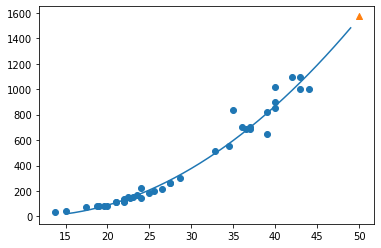

In [ ]:
# 산점도 - 2차 방정식
point = np.arange(15, 50) # 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
plt.scatter(train_input, train_target) # 훈련 세트 산점도
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) # 15에서 49까지 2차 방정식 그래프 생성

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [ ]:
# 모델 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 3-3. 특성 공학과 규제

## 다중 회귀
* 여러 개의 특성을 사용한 선형 회귀
* 특성이 많으면 선형 모델은 강력한 성능 발휘
* 직선이 아닌 평면을 학습함
* 특성 2개 : y(타깃) = a * x1(특성1) + b * x2(특성2) + c(절편)

**특성 공학**
* 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
* ex) 농어 길이 * 농어 높이 = 새로운 특성

## 핵심 패키지와 함수

**1) pandas(판다스)**
* 유명한 데이터 분석 라이브러리
* 데이터프레임이 핵심 구조
* 데이터 다운 받아 사용 가능
* 데이터프레임 -> 넘파이 배열 쉽게 변환 가능

**2) sklearn**

PolynomialFeatures
* transformer(변환기) 클래스 중 하나
* 특성을 만들거나 전처리하기 위한 클래스
* 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가함

In [ ]:
import pandas as pd # 관례적으로 사용하는 판다스 별칭 pd
# 입력 데이터 다운로드
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
# 타깃 데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 훈련 세트, 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures
# 모델 생성
poly = PolynomialFeatures()
# 모델 훈련
poly.fit([[2,3]]) # 2개의 특성 적용, 변환하는데 타깃 데이터는 필요 없음
# 변환
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False) # 1 제외
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
# 모델 생성
poly = PolynomialFeatures(include_bias=False)
# 모델 훈련
poly.fit(train_input)
# 변환
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names() # 특성이 어떤 조합으로 만들어졌는지 알려주는 함수

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
# 변환 - 테스트 세트
test_poly = poly.transform(test_input)

In [ ]:
# 모델 훈련 - 다중 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 평가 - 훈련 세트
print(lr.score(train_poly, train_target))
# 평가 - 테스트 세트
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [ ]:
# 모델 생성 - 고차항
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape) # 특성 개수 55개

(42, 55)


In [ ]:
# 모델 훈련 - 특성 개수 매우 많은
lr.fit(train_poly, train_target)
# 평가 - 훈련 세트
print(lr.score(train_poly, train_target))
# 평가 - 테스트 세트
print(lr.score(test_poly, test_target)) # 음수 => 훈련 세트에 과대 적합

0.9999999999991096
-144.40579242335605


## 규제
* 머신 러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것
* 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
* 선형 모델의 경우, 특성에 곱해지는 계수(기울기)의 크기를 작게 만듬
* 선형 회귀 모델에 규제를 추가한 모델을 **릿지**, **라쏘**라고 함

**릿지(ridge)**
* 계수를 제곱한 값을 기준으로 규제를 적용
* 선형 모델의 계수를 작게 만들어 과대적합을 완화시킴

**라쏘(lasso)**
* 계수의 절댓값을 기준으로 규제를 적용
* 유용한 특성을 골라내는 용도로도 사용 가능
* 릿지와 달리 계수 값을 아예 0으로 만들 수도 있음

**적잘한 규제를 적용하는 법**
* 규제의 양을 임의로 조절 가능함, alpha 매개변수로 조절
* 적절한 alpha 값 찾는 법은 alpha값에 대한 $R^2$값의 그래프를 그려보는 것
* 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값

**하이파라미터**
* 머신러닝 알고리즘이 학습하지 않는 파라미터
* 사람이 사전에 지정해야함
* 대표적으로 릿지와 라쏘의 규제 강도 alpha 파라미터가 있음

## 핵심 패키지와 함수

1) scikit-learn 패키지

PolynomialFeatures
* 주어진 특성을 조합하여 새로운 특성 생성

Ridge
* 릿지 회귀 모델 훈련
* alpha 매개변수로 규제 강도 조절. 값이 클수록 규제가 강해짐. 기본값은 1
* solver 매개변수에 최적의 모델을 찾기 위한 방법 지정 가능

Lasso
* 라쏘 회귀 모델 훈련
* 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 좌표 하강법 사용
* max_iter 알고리즘의 수행 반복 횟수 지정. 기본값 1000

In [ ]:
# 변환 - 표준점수, 규제 적용 전 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly) # 훈련 세트 변환 -> 표준 점수로 변환
test_scaled = ss.transform(test_poly) # 테스트 세트 변환

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) # 훈련 세트
print(ridge.score(test_scaled, test_target)) # 테스트 세트 => 정상으로 돌아옴

0.9896101671037343
0.9790693977615398


In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list: # alpha 값을 늘려가며 릿지 회귀 모델을 훈련
  ridge = Ridge(alpha=alpha) # 릿지 모델 생성
  ridge.fit(train_scaled, train_target) # 릿지 모델 훈련
  # 훈련 점수과 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

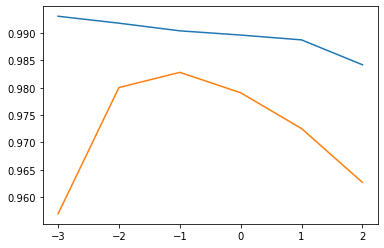

In [ ]:
# 그래프 생성
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
# 점수 차이가 매우 큼 => alpha 값을 0.1로 하여 모델 훈련

In [ ]:
# 모델 생성 - 규제
ridge = Ridge(alpha=0.1) # 규제 alpha값 적용
# 모델 훈련
ridge.fit(train_scaled, train_target)
# 평가
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [ ]:
# 릿쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) # 훈련 세트
print(lasso.score(test_scaled, test_target)) # 테스트 세트

0.9897898972080961
0.9800593698421883


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


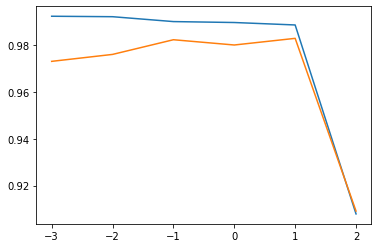

In [ ]:
plt.plot(np.log10(alpha_list), train_score) # x축 로그 스케일로 변경
plt.plot(np.log10(alpha_list), test_score)
plt.show()
# 왼쪽 과대적합 오른쪽 과소적합, 1지점 최적, 최적 alpha값은 10(=10^1)

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0)) # np.sum() True는 1, False는 0으로 인식
# 55개 특성을 주입했지만 라쏘 모델이 사용한 특성 15개

40
